# Comparing ground truth with prediction 3D CNN

This notebook analyses ground truth angles VS prediction angles for 3D CNN model.

## Setup
- Download and unpack training data
- Create DonkeyCar project and load configuration

In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
import os
# do we have the correct env loaded?
assert 'donkey2' == os.environ['CONDA_DEFAULT_ENV'], os.environ['CONDA_DEFAULT_ENV']

In [11]:
import numpy as np
fast_model_fast_data = np.loadtxt('open-loop-results/nighttime-fast-auto-3d-model-nighttime-fast-auto-data-prediction-and-ground-truth.csv.gz')
fast_model_slow_data = np.loadtxt('open-loop-results/nighttime-fast-auto-3d-model-nighttime-slow-auto-data-prediction-and-ground-truth.csv.gz')
slow_model_fast_data = np.loadtxt('open-loop-results/nighttime-slow-auto-3d-model-nighttime-fast-auto-data-prediction-and-ground-truth.csv.gz')
slow_model_slow_data = np.loadtxt('open-loop-results/nighttime-slow-auto-3d-model-nighttime-slow-auto-data-prediction-and-ground-truth.csv.gz')
fast_model_fast_data.shape, fast_model_slow_data.shape, slow_model_fast_data.shape, slow_model_slow_data.shape

((19250, 3), (20304, 2), (19250, 2), (20304, 3))

In [10]:
fast_model_slow_data.shape[1]-1

1

### Plot predictions and ground truths

NB:
1. Graphs need to be read from down-up direction - the start of the recording is in the bottom of the graph.
2. The .9-speed tubs have all the data in it. No train-test split is used here, the 90-speed tubs predictions are better than test and probably worse than train data.

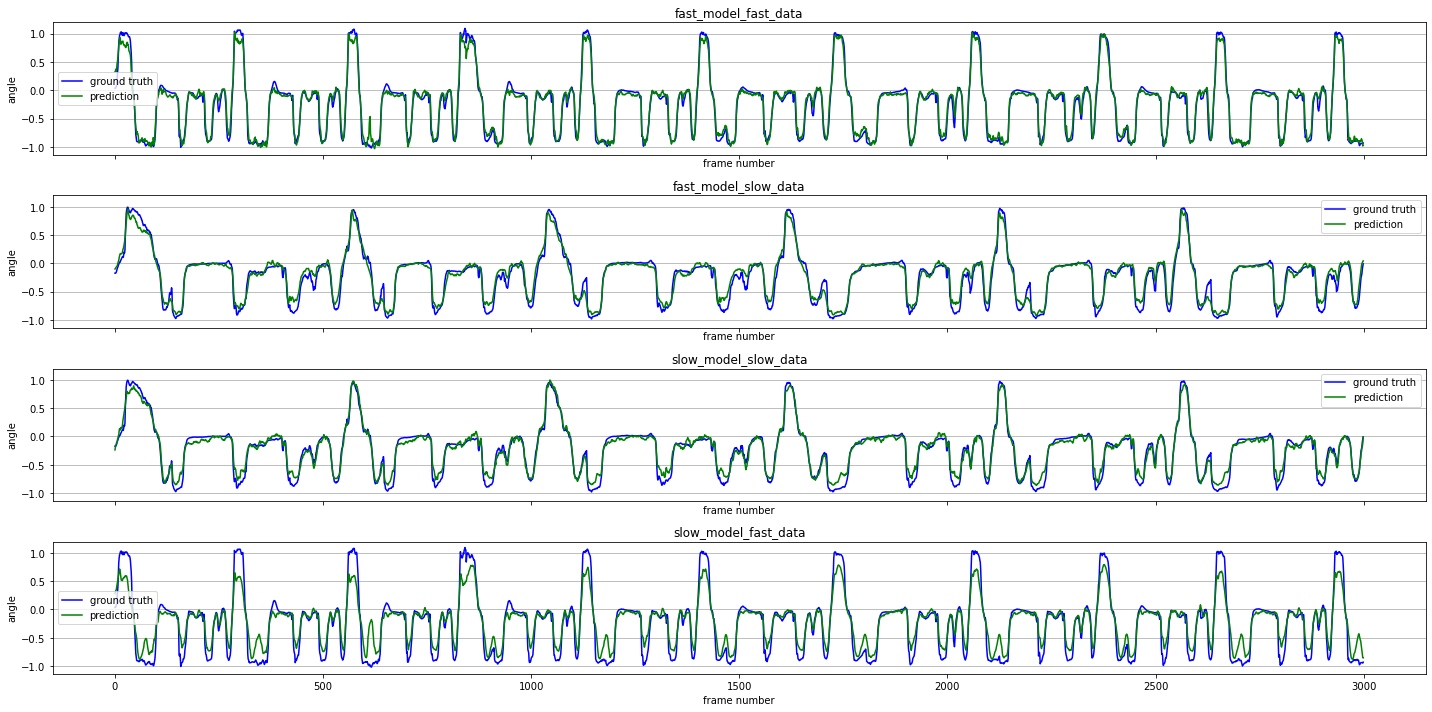

In [29]:
from matplotlib import pyplot as plt

tub_preds_and_ground_truths = dict(
    fast_model_fast_data=fast_model_fast_data,
    fast_model_slow_data=fast_model_slow_data,
    slow_model_slow_data=slow_model_slow_data,
    slow_model_fast_data=slow_model_fast_data,
)

def plot_gt_and_pred(tub_preds_and_ground_truths):
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 10), sharex='all', sharey='all')
    for (name, data), ax in zip(tub_preds_and_ground_truths.items(), axs.flat):
        ax.set(title=name, ylabel='angle', xlabel='frame number')
        ax.grid(True, axis='y')

        gt = data[0:3000, data.shape[1]-1]
        ax.plot(gt, 'b', label='ground truth')

        preds = data[0:3000, data.shape[1]-2]
        ax.plot(preds, 'g', label='prediction')
        ax.legend()
    fig.tight_layout()
    plt.show()


plot_gt_and_pred(tub_preds_and_ground_truths)


In [37]:
import pandas as pd
names = []
gts = []
preds = []
diff_ratios = []
diffs = []
for name, data in tub_preds_and_ground_truths.items():
    names.append(name)
    gt_abs_mean = np.mean(np.abs(data[:, data.shape[1] - 1]))
    gts.append(gt_abs_mean)
    pred_abs_mean = np.mean(np.abs(data[:, data.shape[1] - 2]))
    preds.append(pred_abs_mean)
    diff_ratios.append(1-pred_abs_mean/gt_abs_mean)
    diffs.append(gt_abs_mean-pred_abs_mean)

df = pd.DataFrame({'Model and Data': names, 'Ground Truth absolute mean': gts, 'Prediction absolute mean':preds, '1 - Pred abs mean / GT abs mean': diff_ratios, 'GT abs mean - Pred abs mean':diffs})
df

,Model and Data,Ground Truth absolute mean,Prediction absolute mean,1 - Pred abs mean / GT abs mean,GT abs mean - Pred abs mean
0,fast_model_fast_data,0.432614,0.387825,0.103532,0.044790
1,fast_model_slow_data,0.348772,0.319715,0.083312,0.029057
2,slow_model_slow_data,0.348772,0.303133,0.130857,0.045639
3,slow_model_fast_data,0.432614,0.326054,0.246317,0.106560
